<a href="https://colab.research.google.com/github/Nishit-Dua/Having-fun-with-Keras.datasets/blob/master/Categorical_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [27]:
train_images[0].shape

(32, 32, 3)

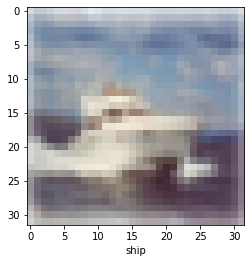

In [26]:
IMAGE_INDEX = random.randint(0,train_images.shape[0])

plt.imshow(train_images[IMAGE_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMAGE_INDEX][0]])
plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images , train_labels, 
                    epochs= 4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9873 - accuracy: 0.6534 - val_loss: 1.0112 - val_accuracy: 0.6509
Epoch 2/4
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8760 - accuracy: 0.6956 - val_loss: 0.9166 - val_accuracy: 0.6829
Epoch 3/4
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7892 - accuracy: 0.7241 - val_loss: 0.9212 - val_accuracy: 0.6863
Epoch 4/4
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7167 - accuracy: 0.7496 - val_loss: 0.8947 - val_accuracy: 0.6980


In [112]:
import numpy as np
prediction = model.predict(test_images)
rand_img = model.predict(np.array(test_images[RANDOM_IMG]).reshape(1,32,32,3))
print(rand_img)#use softmax activation so the neuron output adds up to 1
print(test_labels[RANDOM_IMG])

[[-1.0170915  -6.1015825   0.3773775   0.76093364  2.9270136   0.961281
  -1.8276398   0.7121489  -1.6955693  -3.9037323 ]]
[4]


image number : 7095
Predicted Class :  deer
Actual Class :  deer


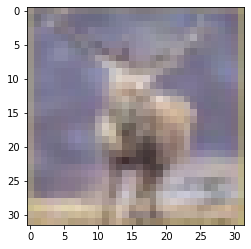

In [109]:
RANDOM_IMG = np.random.randint(0,test_images.shape[0])
print('image number : {}'.format(RANDOM_IMG))
print('Predicted Class : ', class_names[np.argmax(prediction[RANDOM_IMG])])
plt.imshow(test_images[RANDOM_IMG])
print('Actual Class : ', class_names[int(test_labels[RANDOM_IMG])])